## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-007-006-Spectral-Biclustering-01

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

In [2]:
shapecnt = 400
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(shapecnt, shapecnt), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

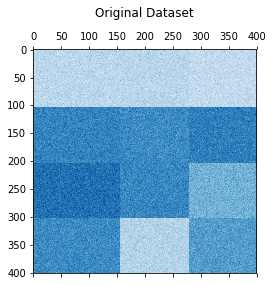

In [3]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original Dataset\n")
plt.show()

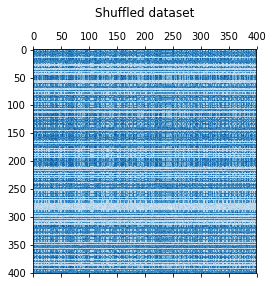

In [4]:
data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset\n")

model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=1968)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

plt.show()

In [5]:
print("Consensus Score: {:.1f}\n".format(score))

Consensus Score: 1.0



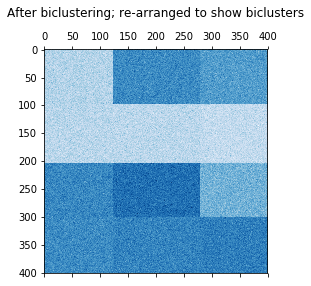

In [6]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; re-arranged to show biclusters\n")

plt.show()

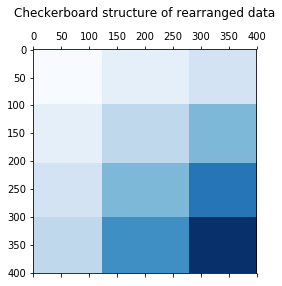

In [7]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data\n")

plt.show()

## Done

In [8]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-21 09:37:08.566798
